<H1>How to transform features into a Normal/Gaussian Distribution</H1>


Note: Math equations are rendered using [KaTex](https://katex.org/) 

<h3>Introduction</h3>

In Machine learning or Deep Learning, some of the models such as Linear Regression, Logistic Regression, Artificial Neural Networks assume that features are normally distributed and can perform much better if the features provided to them during modeling are normally distributed.

But the data provided to us does not necessarily follow a normal distribution. So what should we do in such cases?

<h4>Table of Contents:</h4>

1. A brief introduction to Gaussian Distribution
2. How to check if a variable is following Gaussian Distribution
3. Various Transformations to change the distribution of features

    - Log Transformation
    - Square root Transformation
    - Reciprocal Transformation
    - Exponential Transformation
    - Box-Cox Transformation

<h3>1. A Brief Introduction to the Gaussian Distribution</h3>


In probability theory, a normal (or [Gaussian](https://en.wikipedia.org/wiki/Normal_distribution)) distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is


$$
\Huge{
  f(x) = \frac{1}{\sigma\sqrt{2\pi}}{e^{-\frac{1}{2} (\frac{x-\mu}{\sigma})^2}}
}
$$


Samples of the Gaussian Distribution follow a bell-shaped curve and lies around the mean. The mean, median, and mode of Gaussian Distribution are the same.

<h3>2. How to check if a variable is following a Normal Distribution</h3>

There are various ways in which we can check the distribution of the variables. These include:

- Histogram
- Q-Q plot
- KDE (Kernel Density Estimation) plot
- Skewness and Kurtosis
- [Five Number Summary](https://en.wikipedia.org/wiki/Five-number_summary) (This one just gives the glimpse and not the entire details.)

We will see all the above-mentioned methods with the help of a dataset. For this, we will use a subset of Car price dataset where categorical variables will be excluded for now and will check the distributions on numerical variables.



In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
print('Pandas version: ', pd.__version__)

#reading the dataset
cp = pd.read_csv('data/CarPrice_Assignment.csv')

#taking the subset of the data
cp=cp[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]

#printing first five rows of the data
cp.head()

Pandas version:  1.3.4


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450.0


Check the skewness of the distribution for each feature.

In [2]:
#skewness in the data
cp.skew()

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

From the above result, we can check which variables are normally distributed and which are not.

The variables with skewness > 1 such as wheelbase, compressionratio, horsepower, price are *highly positively skewed*.

The variables with skewness < -1 are *highly negatively skewed*.

The variables with 0.5 < skewness < 1 such as carwidth, curbweight, citympg are *moderately positively skewed*.

The variables with -0.5 < skewness < -1 such as stroke are *moderately negatively skewed*.

And, the variables with *-0.5 < skewness < 0.5* are symmetric i.e *normally distributed* such as symboling, carheight, boreration, peakrpm, highwaympg.

<h3>Checking the distribution of some variables using Histograms</h3>

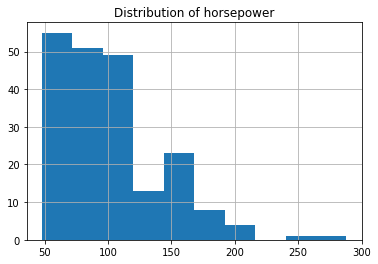

In [3]:
cp.horsepower.hist()
plt.title('Distribution of horsepower');

Output: Highly positive Skewed i.e does not follow a normal distribution

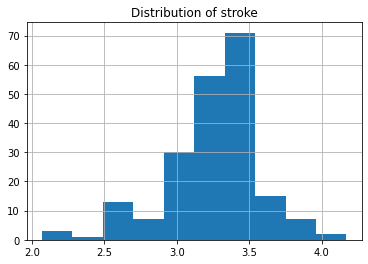

In [4]:
cp.stroke.hist()
plt.title('Distribution of stroke');

Output: Moderately negatively Skewed i.e does not follow a normal distribution

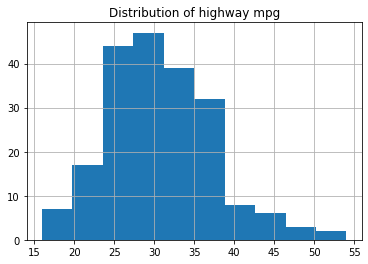

In [5]:
cp.highwaympg.hist()
plt.title('Distribution of highway mpg');

Output: Symmetric i.e does follow a normal distribution

<h3>Checking the distribution of variables using KDE (Kernel Density Estmation) plot</h3>


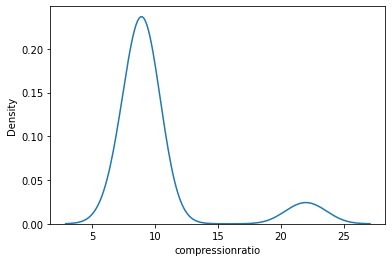

In [6]:
sns.kdeplot(cp.compressionratio);

The distribution of the variable compression ratio is highly positively skewed and is not normally distributed.

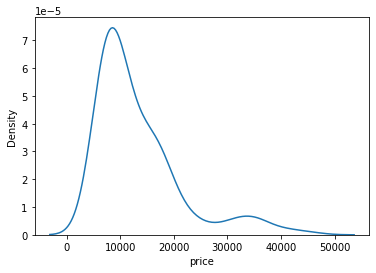

In [7]:
sns.kdeplot(cp.price);

The distribution of the variable price is highly positively skewed and is not normally distributed.

The distribution of both the variables compression ratio and the price is highly positively skewed and is not normally distributed.

<h3>Checking the distribution of variables using a Q-Q plot</h3>

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a roughly straight line.

That is, if the data falls in a straight line then the variable follows normal distribution, otherwise not.


In [8]:
#importing necessary libraries
import scipy.stats as stats
import pylab

From the Skewness and KDE plots, we have seen that the price variable is highly positively skewed. 

Let’s plot the Q-Q plot for the Price variable and check.

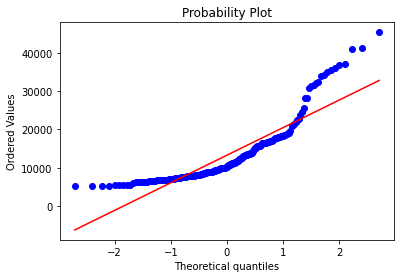

In [9]:
stats.probplot(cp.price,plot=pylab);

The X-axis of the above plot has Quantiles values and Y-axis has the price values. From the plot, we can analyze that the data points of the price feature are not falling on a straight line. This implies that it does not follow a normal distribution.

Let’s check for the city mpg feature now. The graph shows that the majority of the data points of city mpg fall on the straight line so the distribution is normal.

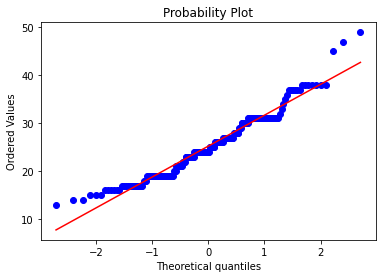

In [10]:
stats.probplot(cp.citympg,plot=pylab);

<h3>3. Transformations to change the distribution of features</h3>

Till now we have seen how to check the distribution of the feature. This section will learn how to convert the variables into the normal distribution if they are not following it.

For this purpose, we will work on a single feature first and will see which transformation out of all works the best to convert the feature into a normal distribution.

First of all, defining a function in python which will take data and feature name as inputs and return the KDE plot and Q-Q plot of the feature.

In [11]:
#function to return plots for the feature
def normality(data, feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

Plotting for the Price feature using the above-defined function:

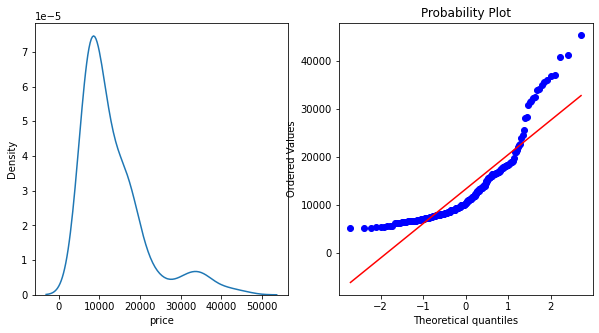

In [12]:
normality(cp,'price')

Performing the transformations on the Price variable.

Logarithmic Transformation – This will convert the Price value to its log value i.e log(Price)

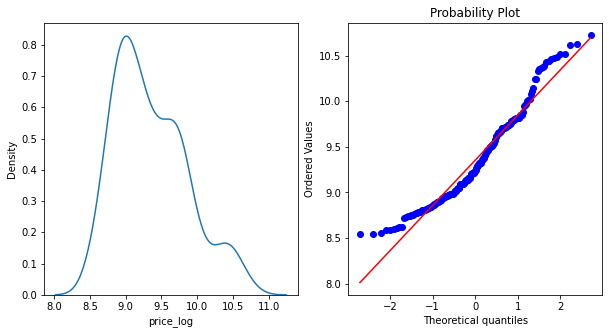

In [13]:
#performing logarithmic transformation on the feature
cp['price_log'] = np.log(cp['price'])

#plotting to check the transformation
normality(cp,'price_log')

The distribution changed slightly and looks moderately skewed now. More data points are also falling on the line in the Q-Q plot.

Reciprocal Transformation – This will inverse values of Price i.e1/Price

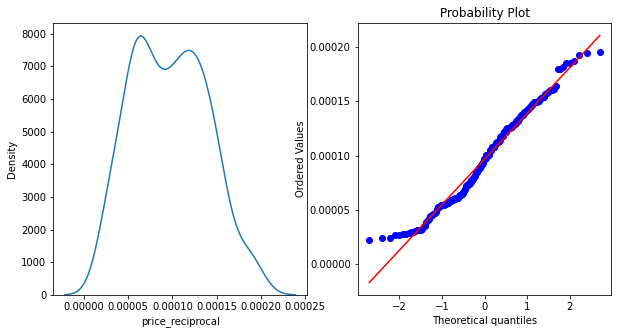

In [14]:
cp['price_reciprocal']=1/cp.price
normality(cp,'price_reciprocal')

The Reciprocal Transformation has kind of converted the feature to normal distribution. Most of the data points are also falling on the line in the Q-Q plot. This one is better than the log transformation for the Price feature.

Square Root Transformation – This transformation will take the square root of the Price column i.e sqrt(Price).

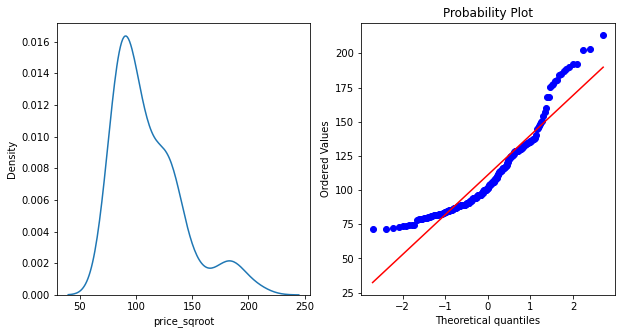

In [15]:
cp['price_sqroot'] = np.sqrt(cp.price)
normality(cp,'price_sqroot')

This one has reduced the skewness of the feature but has not transformed it into a normal distribution.

Exponential Transformation: The exponential value of the Price variable will be taken.

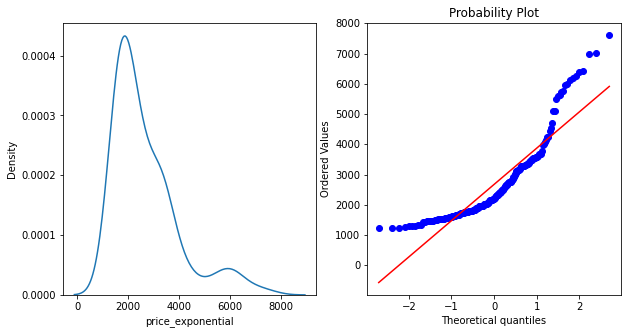

In [16]:
cp['price_exponential'] = cp.price**(1/1.2)
normality(cp,'price_exponential')

Box-Cox Transformation – The Box-Cox transformation is defined as:

$$
\Huge{
y_i^{(\lambda)} = \begin{cases}
   \frac{y_1^{\lambda}-1}{\lambda} &\text{if } \lambda \neq 0 \\
   \ln(y_i) &\text{if } \lambda = 0
\end{cases}
}
$$



where $y$ is the response variable and λ is the transformation parameter. λ value varies from -5 to 5. During the transformation, all values of λ are considered and the optimal/best value for the variable is selected. Natural log(y) is only applied when λ=0.

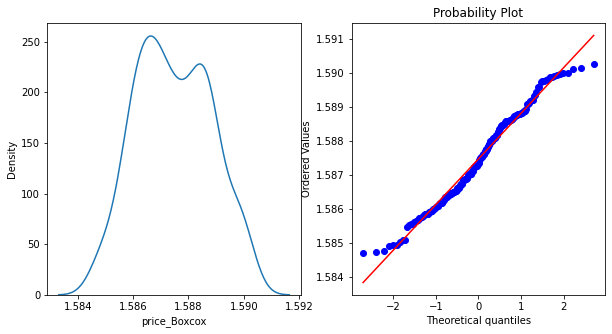

In [17]:
cp['price_Boxcox'],parameters = stats.boxcox(cp['price'])
normality(cp,'price_Boxcox')

Box cox transformation technique also gives a good result and normally distributes the Price feature. The data points on the Q-Q plot are almost on the line as well.

From all the transformations discussed above, we can conclude that the Box cox and Reciprocal transformation perform the best on the Price variable and transform it to normal distribution. Any one of the two can be used but as Box cox is more logic-based and involves the λ variable which is chosen as per the best skewness for the data so Box cox will be a better transformation to go with.